# Plot your results

In [1]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.7.0


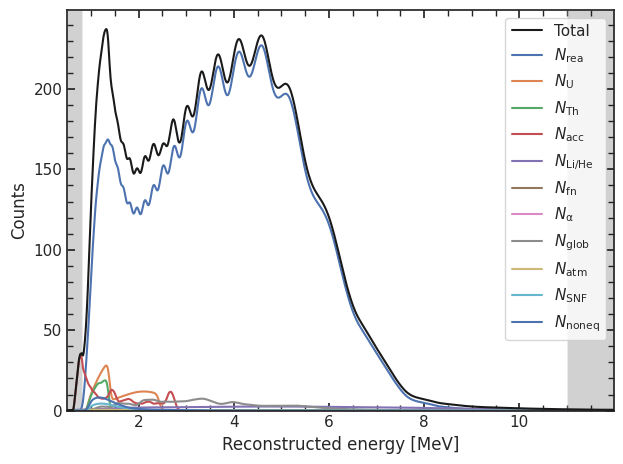

In [2]:
model = orsa.model.read_json('0_test_model.json')
model.exposure = 6*365.25
model

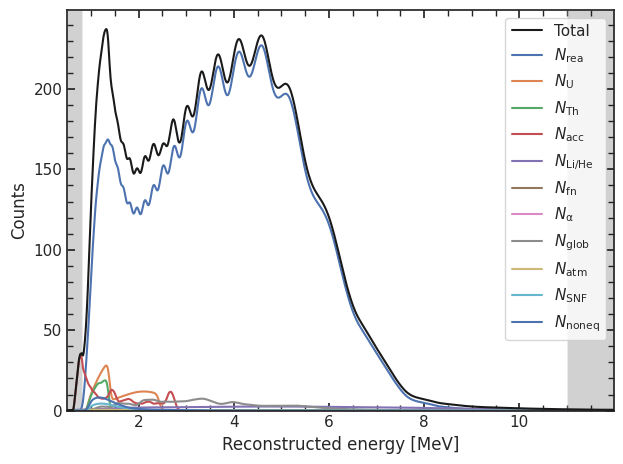

In [3]:
model

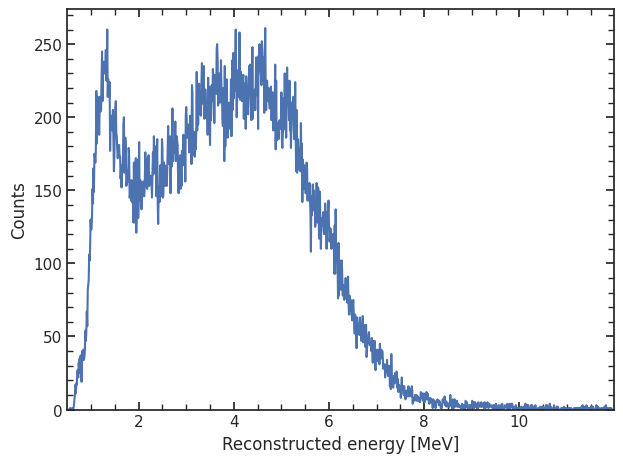

In [4]:
data = model.get_spectrum(asimov = False)
data

In [5]:
for param in model.detector_parameters:
    model.detector_parameters[param].fixed = True

for param in model.core_parameters:
    model.core_parameters[param].fixed = True

for param in model.normalization_parameters:
    if model.normalization_parameters[param].label not in ['rea', 'U', 'Th']:
        model.normalization_parameters[param].fixed = True

model.parameters['rho'].fixed = True

In [6]:
init_model = model.copy()
min_func_bin = orsa.probability.CostFunction(ll=orsa.probability.chi2, ll_args=dict(data=data), lp_args=model.get_priors())
model.use_shape_uncertainty = False
res = orsa.fit.minuit(model, min_func_bin)

Cost function parsed as chi2-like


In [7]:
res.obj

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 951.6                      │              Nfcn = 175              │
│ EDM = 1.83e-05 (Goal: 0.0002)    │            time = 2.0 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ dm2_21 │ 75.35e-6  │  0.21e-6  │            │            │         │         │       │
│ 1 │ dm2_31 │ 2.529e-3  │ 0.004e-3  │            │            │         │         │       │
│ 2 │ s2_12  │  0.3056   │  0.0016   │            │            │         │         │       │
│ 3 │ s2_13  │  0.0251   │  0.0024   │            │            │         │         │       │
│ 4 │ rea    │  291.0e3  │   2.3e3   │            │            │         │         │       │
│ 5 │ U      │  1.85e3   │  0.33e3   │            │            │         │         │       │
│ 6 │ Th     │  0.59e3   │  0.12e3   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │          dm2_21          dm2_31           s2_12           s2_13             rea               U              Th │
├────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ dm2_21 │        4.52e-14       -0.01e-12      -67.77e-12      -23.45e-12 173.55482968e-6 -49.76794597e-6   5.27342149e-6 │
│ dm2_31 │       -0.01e-12        1.31e-11        0.163e-9        0.132e-9   172.473433e-6    13.746774e-6    -3.923121e-6 │
│  s2_12 │      -67.77e-12        0.163e-9        2.51e-06         -0.1e-6       1.9105643     211.4293e-3     -82.1741e-3 │
│  s2_13 │      -23.45e-12        0.132e-9         -0.1e-6        5.72e-06        2.811868       27.545e-3        6.635e-3 │
│    rea │ 173.55482968e-6   172.473433e-6       1.9105643        2.811868        5.37e+06         -0.14e6        -0.035e6 │
│      U │ -49.76794597e-6    13.746774e-6     211.4293e-3       27.545e-3         -0.14e6        1.07e+05        -0.025e6 │
│     Th │   5.27342149e-6    -3.923121e-6     -82.1741e-3        6.635e-3        -0.035e6        -0.025e6        1.55e+04 │
└────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

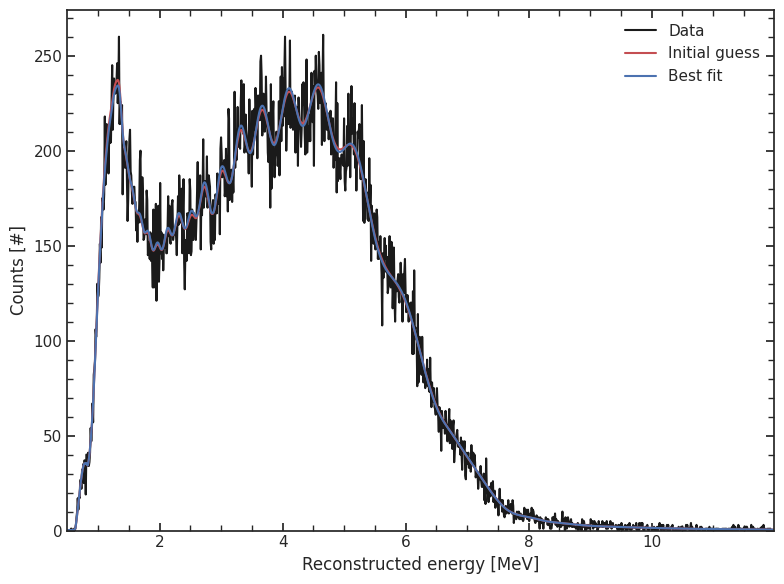

In [8]:
fig, ax = plt.subplots(figsize = (8,6))
sp_initial = init_model.get_spectrum(asimov=True)
sp_final = model.get_spectrum(asimov=True)

ax.plot(data.E, data.counts, 'k-', label = 'Data')
ax.plot(sp_initial.E, sp_initial.counts, 'r-', label = 'Initial guess')
ax.plot(sp_final.E, sp_final.counts, 'b-', label = 'Best fit')
ax.set_xlim(model.E_eval.min(), model.E_eval.max())
ax.set_ylim(bottom = False)
ax.set_xlabel('Reconstructed energy [MeV]')
ax.set_ylabel('Counts [#]')

ax.legend(frameon = False)
fig.tight_layout()

(0.0, 280.0)

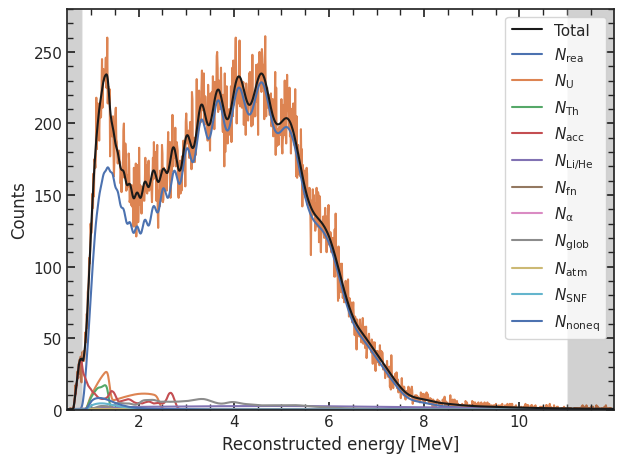

In [9]:
fig, ax = model.get_fig()
ax.plot(data.E, data.counts, zorder = -10)
ax.set_ylim(top = 280)

  1%|          | 7/1000 [00:00<00:15, 62.65it/s]

100%|██████████| 1000/1000 [00:17<00:00, 58.50it/s]


(<Figure size 800x600 with 1 Axes>, <Axes: >)

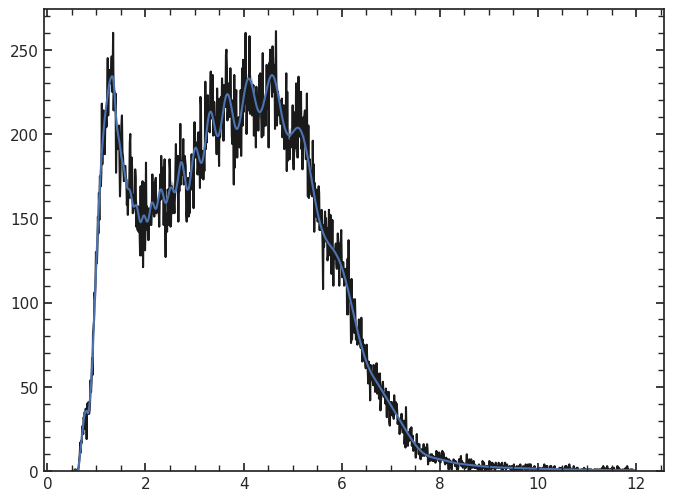

In [10]:
res.get_samples(10000)
orsa.plot.model_ci(res, samples=1000, data=True, n_sigmas=[1,2,3])

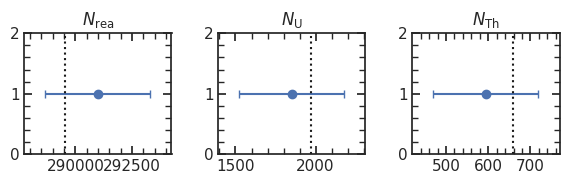

In [11]:
orsa.plot.bars(res, true_values=True, which = ['rea', 'U', 'Th']);

Removed no burn in


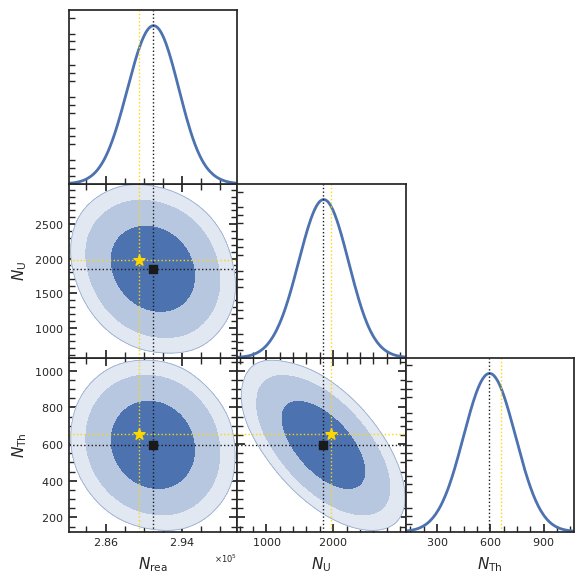

In [12]:
orsa.plot.corner(res, true_values=True, which = ['rea', 'U', 'Th']);

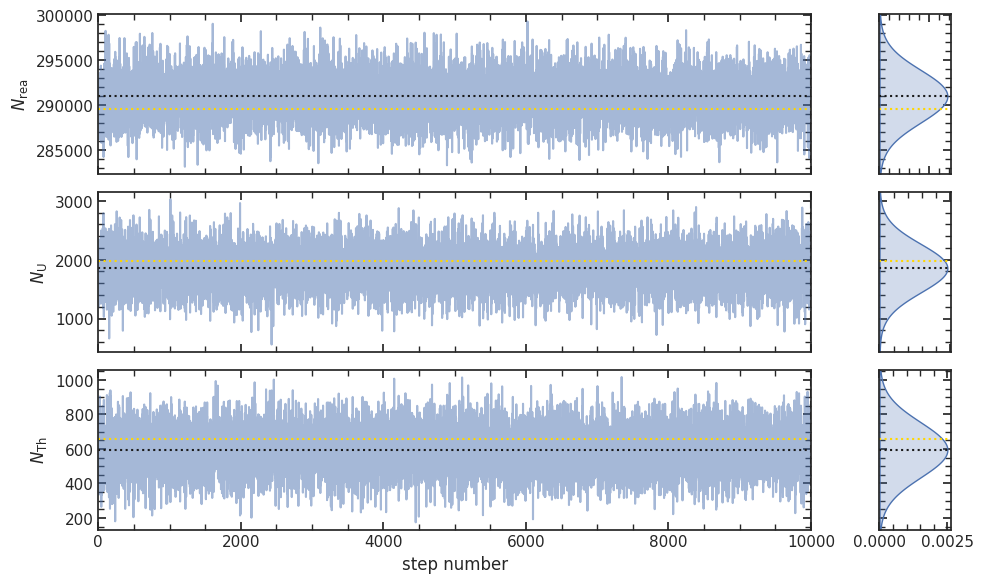

In [13]:
orsa.plot.chain(res, which = ['rea', 'U', 'Th'], cut = None, c = None, ax = None, true_values = True);

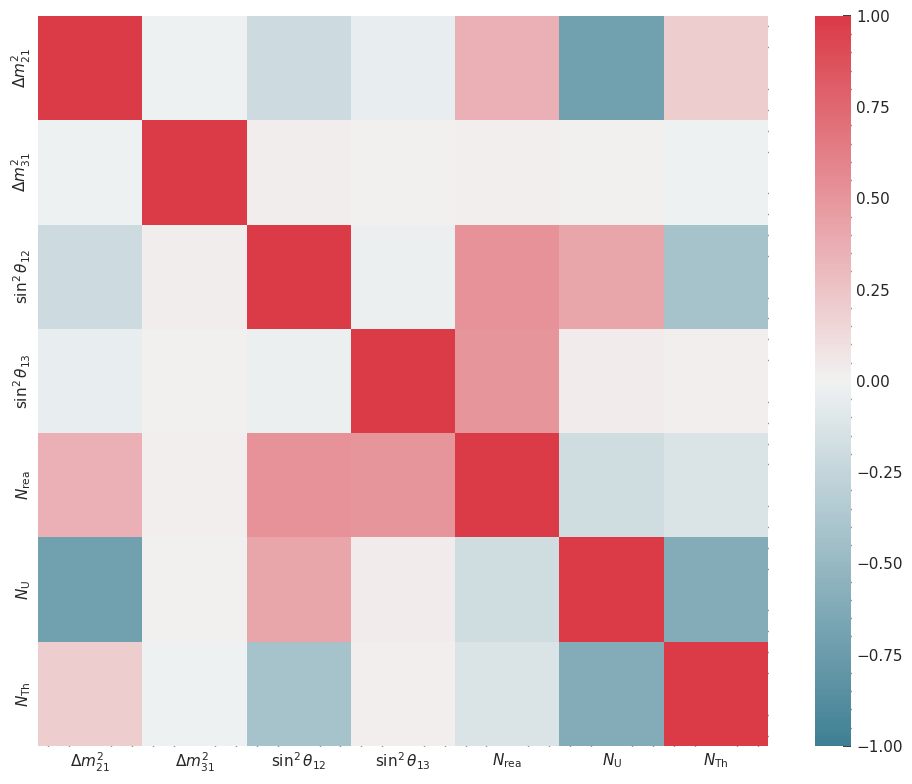

In [14]:
# parse_labels(res, which = ['rea', 'U', 'Th'])
fig, ax = plt.subplots(figsize = (10,8))
ax.set_aspect('equal')
orsa.plot.correlation(res, ax = ax, which = None)#['rea', 'U', 'Th'])
fig.tight_layout()